## Assignment 10

We need to export all the assignment 9 in order to start with Assignment 10.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Importing the external files

In [3]:
ExternalFilesFolder =  r"/Users/apple/Desktop/python4ScientificComputing_Numpy_Pandas_MATPLotLIB/ExternalFiles"
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"

path_consumptionFile = os.path.join(ExternalFilesFolder,ConsumptionFileName)
path_TemperatureFile = os.path.join(ExternalFilesFolder,TemperatureFileName)
path_IrradianceFile = os.path.join(ExternalFilesFolder,IrradianceFileName)

Importing the assignment 9

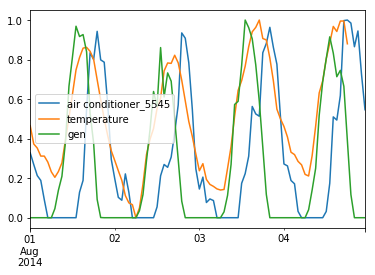

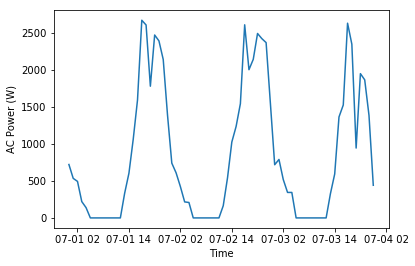

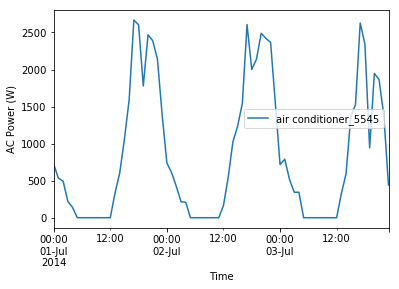

/Users/apple/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/apple/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


temperature -1hr
temperature -2hr
temperature -3hr
temperature -4hr
temperature -5hr
temperature -6hr
temperature -1hr
temperature -2hr
temperature -3hr
temperature -4hr
temperature -5hr
temperature -6hr
irradiance -3hr
irradiance -4hr
irradiance -5hr
irradiance -6hr
AC_consumption -1hr
AC_consumption -2hr
AC_consumption -3hr
AC_consumption -4hr
AC_consumption -5hr
AC_consumption -6hr
AC_consumption -7hr
AC_consumption -8hr
AC_consumption -9hr
AC_consumption -10hr
AC_consumption -11hr
AC_consumption -12hr
AC_consumption -13hr
AC_consumption -14hr
AC_consumption -15hr
AC_consumption -16hr
AC_consumption -17hr
AC_consumption -18hr
AC_consumption -19hr
AC_consumption -20hr
AC_consumption -21hr
AC_consumption -22hr
AC_consumption -23hr
AC_consumption -24hr


In [5]:
DF_consumption = pd.read_csv(path_consumptionFile,sep=",", index_col=0)
DF_consumption.head()
DF_consumption.tail(10)

PreviousIndex = DF_consumption.index
NewParsedIndex= pd.to_datetime(PreviousIndex)
DF_consumption.index =NewParsedIndex 

DF_consumption.head()
DF_consumption.index.hour
DF_consumption.index.month
DF_consumption.index.dayofweek

DF_consumption_someDaysInJuly=DF_consumption["2014-07-01 00:00:00":"2014-07-03 23:00:00"]

plt.figure()
plt.plot(DF_consumption_someDaysInJuly)
plt.xlabel("Time")
plt.ylabel("AC Power (W)")
plt.show()

# There is asecond way of doing this !!!
plt.figure()
DF_consumption_someDaysInJuly.plot()
plt.xlabel("Time")
plt.ylabel("AC Power (W)")
plt.show()

#This is better !!

# LEt's import the weather data 

DF_weather = pd.read_csv(path_TemperatureFile,sep=";",index_col=0)
DF_weather.head(24)
previousIndex_weather=DF_weather.index
newIndex_weather=pd.to_datetime(previousIndex_weather)
DF_weather.index = newIndex_weather
DF_weather.columns
Series_Temperature = DF_weather["temperature"]

DF_Temperature= DF_weather[["temperature"]]
DF_Temperature.head()


DF_irradianceSource = pd.read_csv(path_IrradianceFile,sep=";",index_col=1)
DF_irradianceSource.head(24)

DF_irradiance=DF_irradianceSource[["gen"]]
DF_irradiance.head(24)

DF_irradiance["gen"]<0
DF_irradiance[DF_irradiance["gen"]<0] = 0
DF_irradiance.head(24)

DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_joined.head(24)

DF_joined_cleaned = DF_joined.dropna()
DF_joined_cleaned.head(24)

DF_joined_cleaned_copy = DF_joined.dropna().copy()

DF_joined_cleaned_chosenDates = DF_joined_cleaned_copy["2014-08-01":"2014-08-04"]

# We need to solve the problem with the timezone
DF_joined_cleaned_chosenDates["temperature"]=DF_joined_cleaned_chosenDates["temperature"].shift(-5)
DF_joined_cleaned_chosenDates.dropna()
DF_joined_cleaned_chosenDates.head()
DF_joined_cleaned_chosenDates.describe()

DF_joined_cleaned_chosenDates_min=DF_joined_cleaned_chosenDates.min()
DF_joined_cleaned_chosenDates_max=DF_joined_cleaned_chosenDates.max()
DF_joined_cleaned_chosenDates_normalized= (DF_joined_cleaned_chosenDates-DF_joined_cleaned_chosenDates_min)/(DF_joined_cleaned_chosenDates_max-DF_joined_cleaned_chosenDates_min)
plt.figure()
DF_joined_cleaned_chosenDates_normalized.plot()


# Creating lagged features
# First let me reconstruct my dataframe by applying time-zone to the whole dataset

DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_mod = DF_joined.copy()
DF_mod["temperature"]=DF_mod["temperature"].shift(-5)
DF_mod.dropna(inplace=True) # It is the same as writing it like this: DF_mod=DF_mod.dropna()
# In order to consider the time-lags we will need to include 
# all of these columns with lags (shifts)
DF_mod.head()
DF_mod.describe()
"""
DF_mod["Temperature -1h"]= DF_mod["temperature"].shift(1)
DF_mod["Temperature -2h"]= DF_mod["temperature"].shift(2)
DF_mod["Temperature -3h"]= DF_mod["temperature"].shift(2)
DF_mod["Temperature -4h"]= DF_mod["temperature"].shift(2)
DF_mod["Temperature -5h"]= DF_mod["temperature"].shift(2)
DF_mod["Temperature -6h"]= DF_mod["temperature"].shift(2)
DF_mod.head()
"""
# but there is abetter way of doing this !!

lag_start=1
lag_end = 6
lag_interval=1
 

column_name="temperature"
df=DF_mod
for i in range(lag_start,lag_end+1,lag_interval):
    new_column_name = column_name+" -"+str(i)+"hr"
    print new_column_name
    df[new_column_name]=df[column_name].shift(i)   
    df.dropna(inplace=True) #this removes all the row with a Nan

def lag_feature(df,column_name,lag_start,lag_end,lag_interval):
    for i in range(lag_start,lag_end+1,lag_interval):
        new_column_name = column_name+" -"+str(i)+"hr"
        print new_column_name
        df[new_column_name]=df[column_name].shift(i)   
        df.dropna(inplace=True) #this removes all the row with a Nan
    return df



# Let's do the same for the irradiance and consumption
# but I don't like the names of irradiance and consumption columns

# For renaming the column names , you have two ways

#DF_mod.columns =["AC_consumption","temperature","irradiance"]
# The second way of doing this:
DF_mod=DF_mod.rename(columns={"air conditioner_5545":"AC_consumption","gen":"irradiance"})

DF_mod=  lag_feature(DF_mod,"temperature",1,6,1)
DF_mod.head()
# Let's lag the irraidance , I would do it just for 3 to 6 hours
DF_mod=  lag_feature(DF_mod,"irradiance",3,6,1)

# Let's add the previous consumptions in the last 24 hours!
DF_mod=  lag_feature(DF_mod,"AC_consumption",1,24,1)
DF_mod.head()
DF_mod.describe()

# Now let's add the seasonality parameters (time-related parameters)

DF_mod["hour"]=DF_mod.index.hour
DF_mod["hour"].head()
DF_mod["sin_hour"]=np.sin(DF_mod.index.hour*2*np.pi/24)
DF_mod["cos_hour"]=np.cos(DF_mod.index.hour*2*np.pi/24)

DF_mod["day_of_week"]=DF_mod.index.dayofweek
DF_mod[["hour","sin_hour","cos_hour","day_of_week"]].head(24)

DF_mod["month"]=DF_mod.index.month

DF_mod["week_of_year"]=DF_mod.index.week

def WeekendDetector(day):
    if (day==5 or day == 6):
        weekendLabel=1
    else:
        weekendLabel=0
    return weekendLabel

DF_mod["weekend"]= DF_mod["day_of_week"].apply(WeekendDetector)
    
def DayDetector(hour):
    if (hour< 19 and hour>=9):
        DayLabel=1
    else:
        DayLabel=0
    return DayLabel


### Machine Learning

In [6]:
DF_mod.head()
DF_mod.columns
DF_mod.corr()
DF_mod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8310 entries, 2014-01-16 06:00:00 to 2014-12-31 00:00:00
Data columns (total 44 columns):
AC_consumption          8310 non-null float64
temperature             8310 non-null float64
irradiance              8310 non-null float64
temperature -1hr        8310 non-null float64
temperature -2hr        8310 non-null float64
temperature -3hr        8310 non-null float64
temperature -4hr        8310 non-null float64
temperature -5hr        8310 non-null float64
temperature -6hr        8310 non-null float64
irradiance -3hr         8310 non-null float64
irradiance -4hr         8310 non-null float64
irradiance -5hr         8310 non-null float64
irradiance -6hr         8310 non-null float64
AC_consumption -1hr     8310 non-null float64
AC_consumption -2hr     8310 non-null float64
AC_consumption -3hr     8310 non-null float64
AC_consumption -4hr     8310 non-null float64
AC_consumption -5hr     8310 non-null float64
AC_consumption -6hr     8310 

We choose our data frame to be analyzed on the date where we are going to use most the air conditioning, then define our target and features.

In [8]:
DF_mod=DF_mod["2014-03-01":"2014-09-30"]
DF_target=DF_mod["AC_consumption"]
DF_features=DF_mod.drop("AC_consumption",axis=1)


Now we are going to use sklearn to divide into subgroups.
X corresponds to features and Y corresponds to target.

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(DF_features,DF_target,test_size = 0.2, random_state=41234)

from sklearn import linear_model
linear_reg = linear_model.LinearRegression()

The second step will be fitting a model

In [10]:
linear_reg.fit(X_train, Y_train)

predicted_linearReg_split = linear_reg.predict(X_test)

predicted_DF_linearReg_split=pd.DataFrame(predicted_linearReg_split,index=Y_test.index, columns=["AC_cons_predicted_linearReg_split"])
predicted_DF_linearReg_split=predicted_DF_linearReg_split.join(Y_test)

We check if the prediction is working and plot to see how similar could be the prediction to the real values.


In [11]:
predicted_DF_linearReg_split_august=predicted_DF_linearReg_split["2014-08-01":"2014-08-31"]
predicted_DF_linearReg_split_august.plot()

Now we want calculate how accurate our predictions are.
Again we import everything

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg_split= mean_absolute_error(predicted_linearReg_split,Y_test)
MSE_linearReg_split= mean_squared_error(predicted_linearReg_split,Y_test)
R2_linearReg_split = r2_score(predicted_linearReg_split,Y_test)

The second way of doing this is using k-fold cross valiadtion

In [16]:
from sklearn.model_selection import cross_val_predict
predict_linearReg_CV = cross_val_predict(linear_reg,DF_features,DF_target,cv=10)
predicted_DF_linearReg_CV=pd.DataFrame(predict_linearReg_CV,
                                       index=DF_target.index, 
                                       columns=["AC_cons_predicted_linearReg_CV"])
predicted_DF_linearReg_CV=predicted_DF_linearReg_CV.join(DF_target)
predicted_DF_linearReg_CV_august=predicted_DF_linearReg_CV["2014-08-01":"2014-08-31"]
predicted_DF_linearReg_CV_august.plot()

MAE_linearReg_CV= mean_absolute_error(predict_linearReg_CV,DF_target)
MSE_linearReg_CV= mean_squared_error(predict_linearReg_CV,DF_target)
R2_linearReg_CV = r2_score(predict_linearReg_CV,DF_target)

Now, we try another algorithm which is Random forests.

In [15]:
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor()

predict_RF_CV = cross_val_predict(reg_RF,DF_features,DF_target,cv=10)

predicted_DF_RF_CV=pd.DataFrame(predict_RF_CV,
                                       index=DF_target.index, 
                                       columns=["AC_cons_predicted_RF_CV"])
predicted_DF_RF_CV=predicted_DF_RF_CV.join(DF_target)
predicted_DF_RF_CV_august=predicted_DF_RF_CV["2014-08-01":"2014-08-31"]
predicted_DF_RF_CV_august.plot()

MAE_RF_CV= mean_absolute_error(predict_RF_CV,DF_target)
MSE_RF_CV= mean_squared_error(predict_RF_CV,DF_target)
R2_RF_CV = r2_score(predict_RF_CV,DF_target)


If we want to use online learning:

In [17]:
DF_onlineConsumptionPrediction = pd.DataFrame(index=DF_mod.index)
period_of_training = pd.Timedelta(30, unit="d")

FirstTimeStamp_measured = DF_mod.index[0]
LastTimeStamp_measured = DF_mod.index[-1]

FirstTimeStamp_toPredict= FirstTimeStamp_measured+period_of_training

training_startTimeStamp=FirstTimeStamp_measured
training_endTimeStamp=FirstTimeStamp_toPredict # it is called end because it will include this time stamp !!
timeStamp_toPredict= FirstTimeStamp_toPredict
DF_onlineConsumptionPrediction=DF_onlineConsumptionPrediction.truncate(before=training_endTimeStamp)

We change the variable by adding a one-hour timedelta, so we will always change our training and test for its properties.

We use the data of the previous month because it is good to predict and also because is recent so it is better to do it one month before.

In [ ]:
while (timeStamp_toPredict< LastTimeStamp_measured):
    #print timeStamp_toPredict
    #DF_feature_train=DF_features.loc[training_startTimeStamp:training_endTimeStamp]
    DF_feature_train=DF_features.truncate(before=training_startTimeStamp,after=training_endTimeStamp)
    DF_target_train= DF_target.truncate(before=training_startTimeStamp,after=training_endTimeStamp)
    
    DF_feature_test = DF_features.loc[timeStamp_toPredict].values.reshape(1,-1) # If you dont add this it gives you an error, because you can not have a single line feature
    DF_target_test=DF_target.loc[timeStamp_toPredict]
    reg_RF.fit(DF_feature_train,DF_target_train) # Here I am just training with my training data
    predicted_Consumption = linear_reg.predict(DF_feature_test)
    DF_onlineConsumptionPrediction.loc[timeStamp_toPredict,"Predicted"]=predicted_Consumption
    DF_onlineConsumptionPrediction.loc[timeStamp_toPredict,"Real"] = DF_target_test

    
    timeStamp_toPredict=timeStamp_toPredict+pd.Timedelta(1, unit="h")
    training_endTimeStamp=training_endTimeStamp+pd.Timedelta(1, unit="h")
    training_startTimeStamp=training_startTimeStamp + pd.Timedelta(1, unit="h")

DF_onlineConsumptionPrediction.dropna(inplace=True)

So we calculate how accurate is with the online learning for model prediction Random Forest.


In [ ]:
R2_score_online_linearReg = r2_score(DF_onlineConsumptionPrediction[["Real"]],
                                     DF_onlineConsumptionPrediction[["Predicted"]])